<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bar Charts**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be provided to you in the form of an RDBMS.

You will use SQL queries to extract the necessary data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data

-   Visualize the relationship between two features

-   Visualize the composition of data

-   Visualize comparison of data


## Setup: Working with the Database
**Install the needed libraries**


In [2]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 141.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 170.1 MB/s eta 0:00:00


In [3]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 101.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 92.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 81.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 109.3 MB/s eta 0:00:00


In [4]:
!pip install seaborn

In [5]:
!pip install numpy

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [6]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Step 2: Import necessary libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows to understand the structure of the data
df.head()


--2025-07-12 05:00:57--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
connected. to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... 
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  55.6MB/s    in 2.7s    

2025-07-12 05:01:00 (55.6 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Visualizing Data Distributions


##### 1. Histogram of `ConvertedCompYearly`


Visualize the distribution of yearly compensation (`ConvertedCompYearly`) using a histogram.



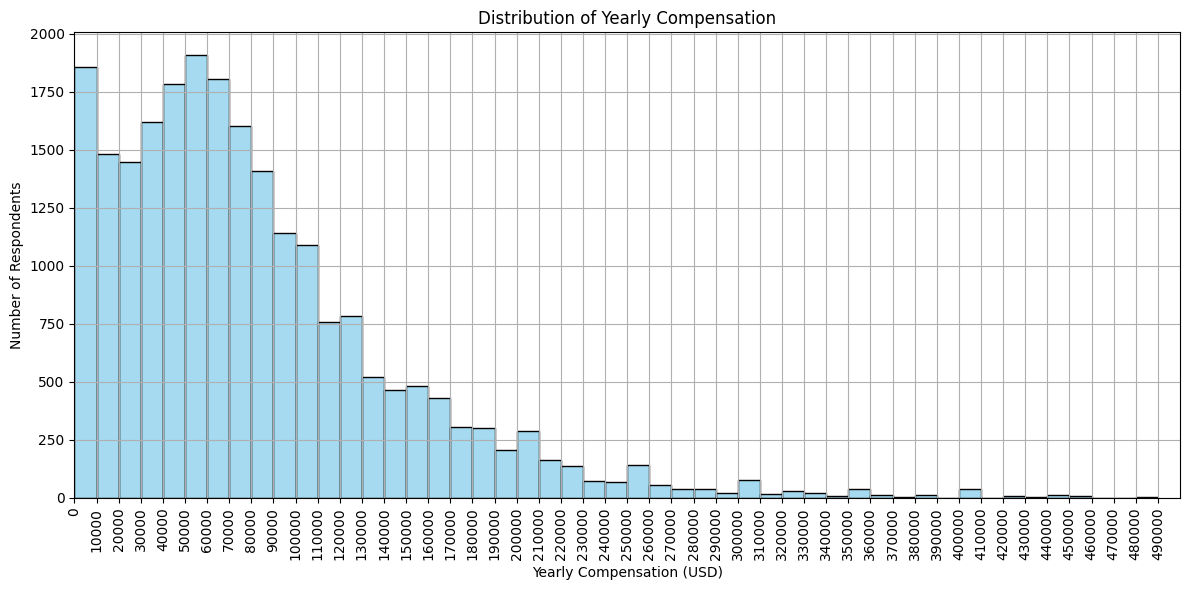

In [7]:
import seaborn as sns

# Drop missing or unrealistic values
df_clean = df['ConvertedCompYearly'].dropna()
df_clean = df_clean[(df_clean > 1_000) & (df_clean < 1_000_000)]

bins = np.arange(0 , 500000, 10000)
# 2. Plot histogram
plt.figure(figsize=(12, 6))
sns.histplot(df_clean, bins=bins, kde=False, color='skyblue',edgecolor='black',linewidth=1)

# 3. Label chart
plt.title('Distribution of Yearly Compensation')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Number of Respondents')
plt.xlim(1000,500000)
plt.xticks(np.arange(0,500000,10000), rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()


##### 2. Box Plot of `Age`


Since `Age` is categorical in the dataset, convert it to numerical values for a box plot.



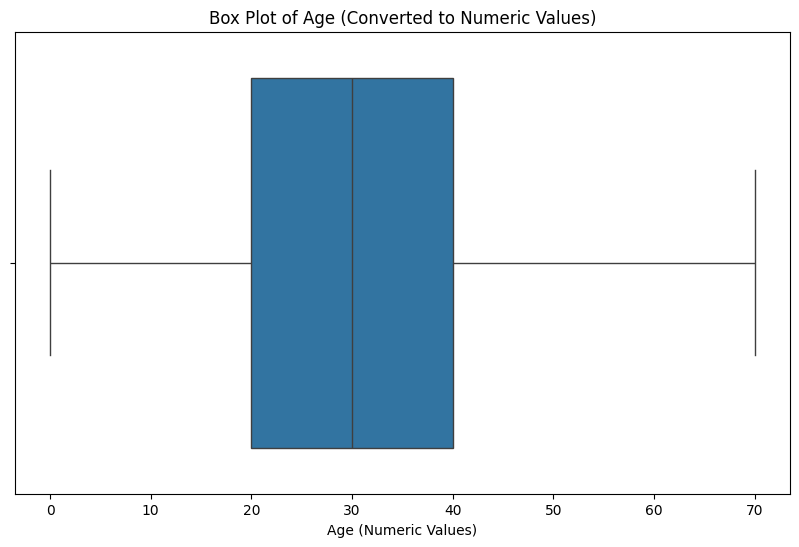

In [8]:
# Convert the 'Age' column to numeric values
age_mapping = {
    'Under 18 years old': 17, '18-24 years old': 20, '25-34 years old': 30, '35-44 years old': 40,
    '45-54 years old': 50, '55-64 years old': 60, '65 years or older': 70, 'Prefer not to say': 0
}
df['AgeNum'] = df['Age'].map(age_mapping)

# Create the box plot for AgeNum
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['AgeNum'])

# Set labels and title
plt.xlabel('Age (Numeric Values)')
plt.ylabel('')
plt.title('Box Plot of Age (Converted to Numeric Values)')

# Show the plot
plt.show()


### Task 2: Visualizing Relationships in Data


##### 1. Scatter Plot of `Age_numeric` and `ConvertedCompYearly`


Explore the relationship between age and compensation.



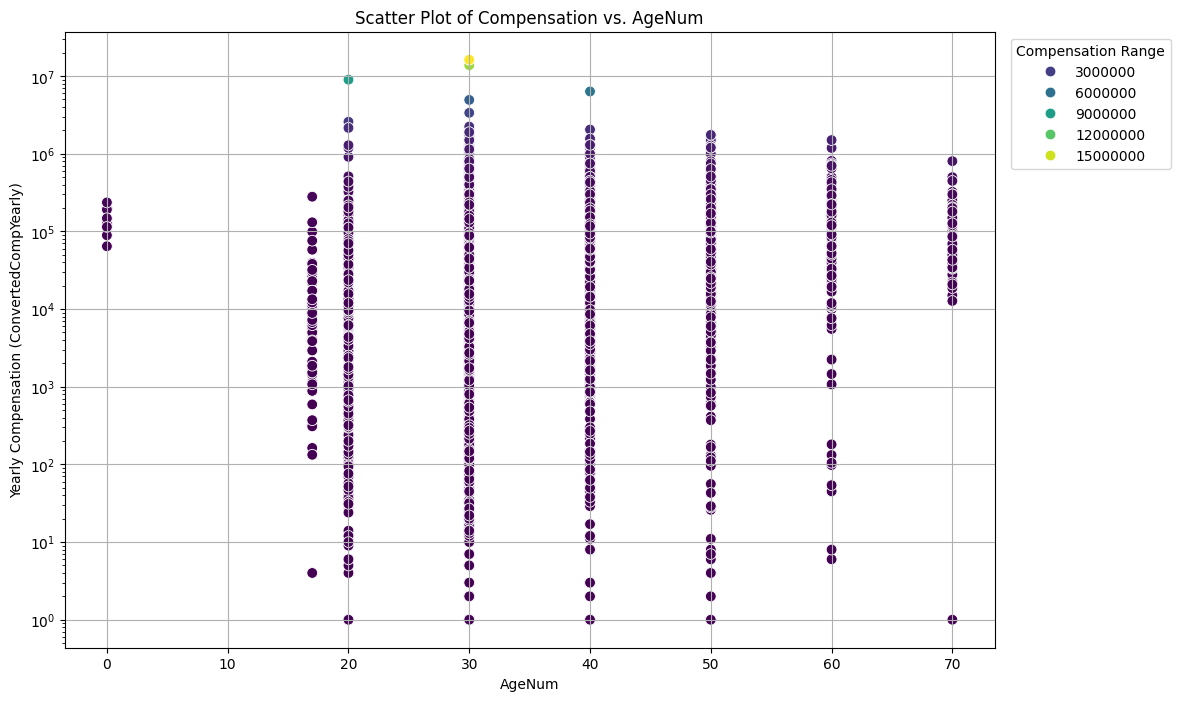

In [9]:
df_filtered = df.dropna(subset=['ConvertedCompYearly', 'AgeNum'])

# Create the scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_filtered, x='AgeNum', y='ConvertedCompYearly', hue='ConvertedCompYearly',
                palette='viridis',s=60)

plt.title('Scatter Plot of Compensation vs. AgeNum')
plt.xlabel('AgeNum')
plt.yscale('log')
plt.ylabel('Yearly Compensation (ConvertedCompYearly)')
plt.legend(title='Compensation Range', bbox_to_anchor=(1.01, 1), loc='upper left')
plt.grid(True)
plt.show()

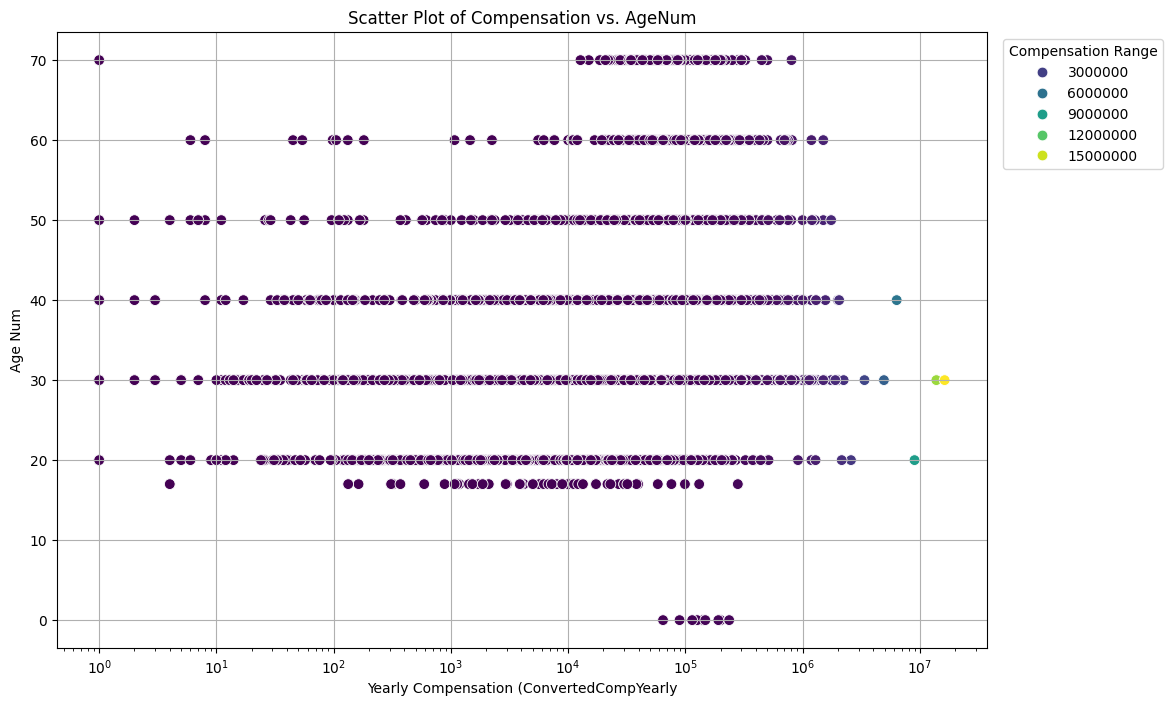

In [10]:
df_filtered = df.dropna(subset=['ConvertedCompYearly', 'AgeNum'])

# Create the scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_filtered, y='AgeNum', x='ConvertedCompYearly', hue='ConvertedCompYearly',
                palette='viridis',s=60)

plt.title('Scatter Plot of Compensation vs. AgeNum')
plt.xlabel('Yearly Compensation (ConvertedCompYearly')
plt.xscale('log')
plt.ylabel('Age Num')
plt.legend(title='Compensation Range', bbox_to_anchor=(1.01, 1), loc='upper left')
plt.grid(True)
plt.show()

##### 2. Bubble Plot of `ConvertedCompYearly` and `JobSatPoints_6` with `Age_numeric` as Bubble Size


Explore how compensation and job satisfaction are related, with age as the bubble size.


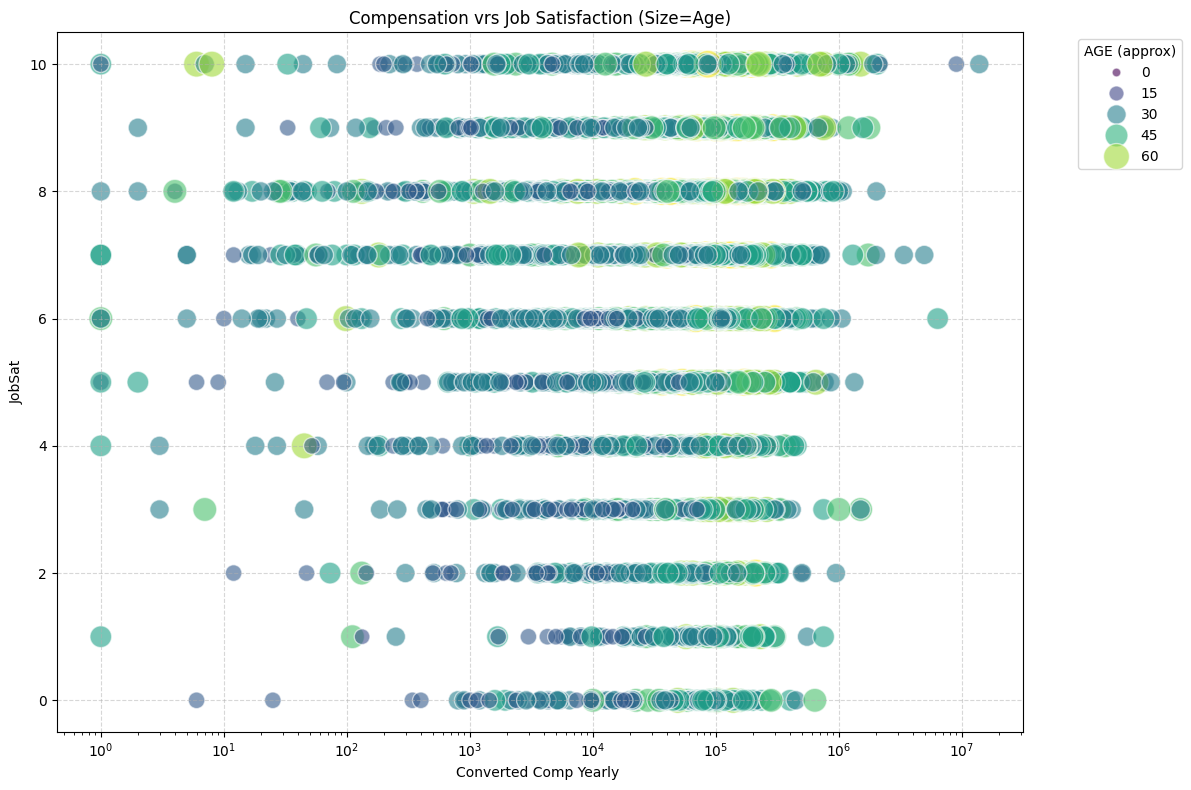

In [11]:
#drop rows with Missing value
df_filtered=df.dropna(subset=['ConvertedCompYearly','JobSat','AgeNum'])

#Plot
plt.figure(figsize=(12, 8))
sns.scatterplot(
        data=df_filtered,
        x='ConvertedCompYearly',
        y='JobSat',
        size='AgeNum',
        sizes=(40, 400),
        hue='AgeNum',
        palette='viridis',
        alpha=0.6
)


plt.title('Compensation vrs Job Satisfaction (Size=Age)')
plt.xlabel('Converted Comp Yearly ')
plt.xscale('log')
plt.ylabel('JobSat')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='AGE (approx)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Task 3: Visualizing Composition of Data with Bar Charts


##### 1. Horizontal Bar Chart of `MainBranch` Distribution


Visualize the distribution of respondents’ primary roles to understand their professional focus.



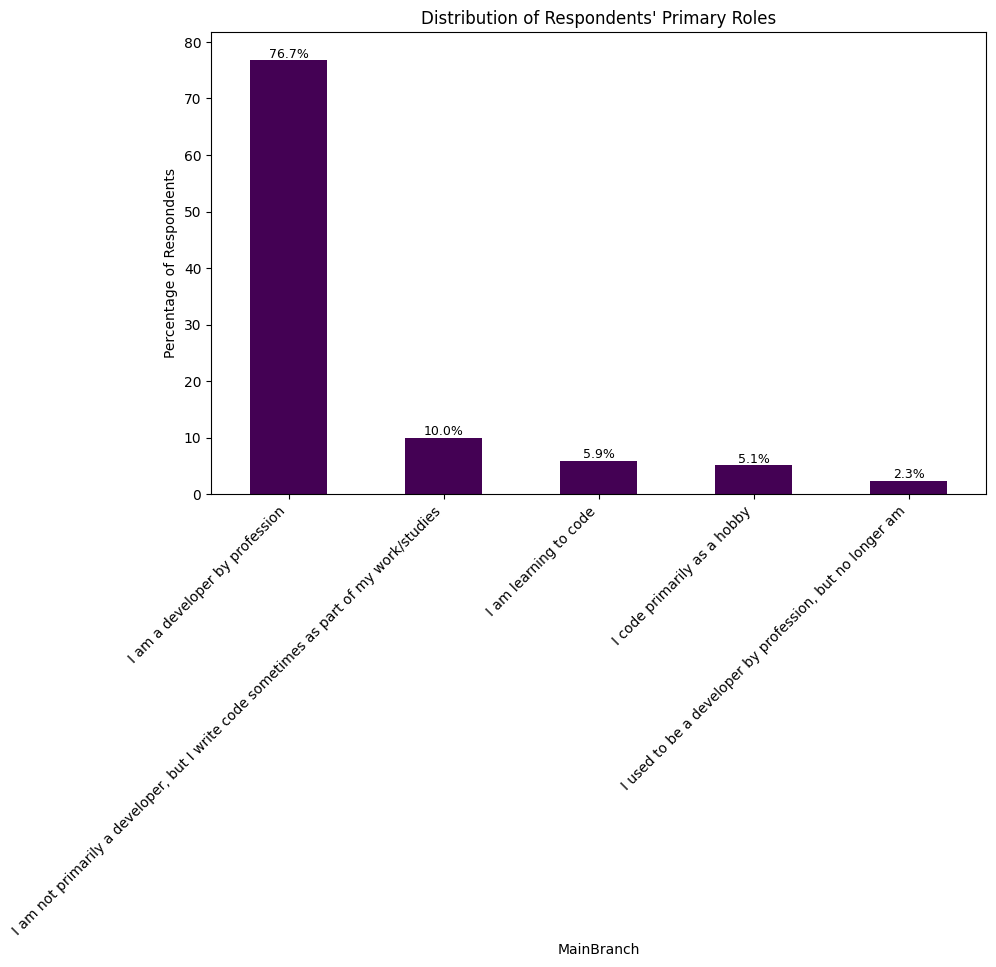

In [26]:
df_clean=df['MainBranch'].dropna()

df_branch=df_clean.value_counts().reset_index()
df_branch.columns=['MainBranch', 'Count']

# Add percentage column
df_branch['Percent'] = df_branch['Count'] / df_branch['Count'].sum() * 100


# Plot
ax = df_branch.plot(
    kind='bar',
    x='MainBranch',
    y='Percent',
    figsize=(10, 6),
    colormap='viridis',
    legend=False
)

# Format y-axis as %
ax.set_ylabel('Percentage of Respondents')
ax.set_title("Distribution of Respondents' Primary Roles")
ax.set_ylim(0, df_branch['Percent'].max() + 5)

# Optional: Show % labels on bars
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2,
        p.get_height() + 0.5,
        f"{p.get_height():.1f}%",
        ha='center',
        fontsize=9
    )

plt.xticks(rotation=45, ha='right')
#plt.tight_layout()
plt.show()


##### 2. Vertical Bar Chart of Top 5 Programming Languages Respondents Want to Work With


Identify the most desired programming languages based on `LanguageWantToWorkWith`.



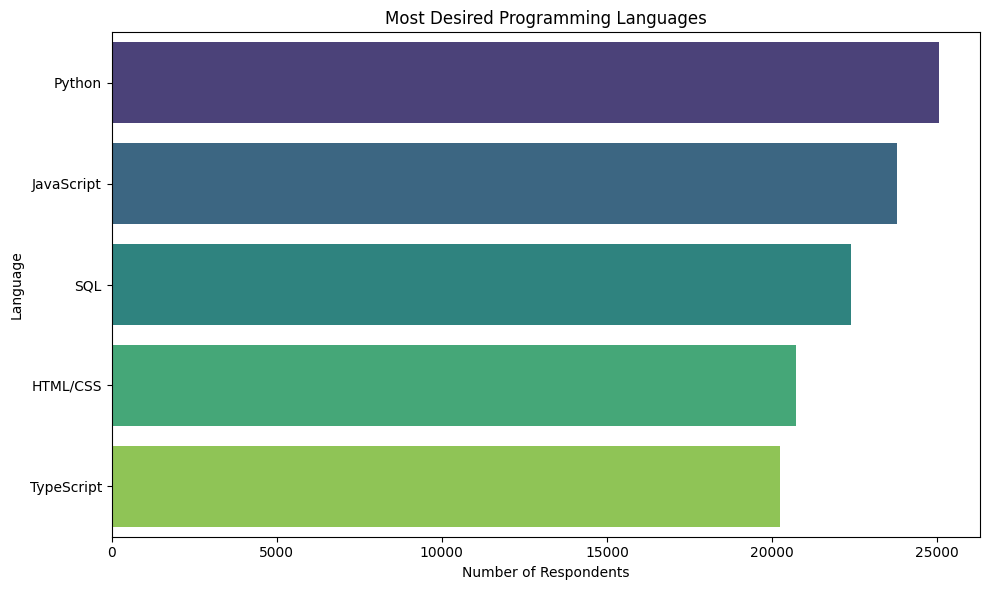

In [29]:
# 1. Drop missing values
df_lang = df['LanguageWantToWorkWith'].dropna()

# 2. Split multiple entries (assume delimiter is ";")
df_expanded = df_lang.str.split(';').explode().str.strip()

# 3. Count occurrences
language_counts = df_expanded.value_counts().reset_index()
language_counts.columns = ['Language', 'RespondentCount']

top_languages = language_counts.head(5)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_languages, y='Language', x='RespondentCount',hue='Language', palette='viridis')

plt.title('Most Desired Programming Languages')
plt.xlabel('Number of Respondents')
plt.ylabel('Language')
plt.tight_layout()
plt.show()

##### 3. Stacked Bar Chart of Median `JobSatPoints_6` and `JobSatPoints_7` by Age Group


Compare job satisfaction metrics across different age groups with a stacked bar chart.


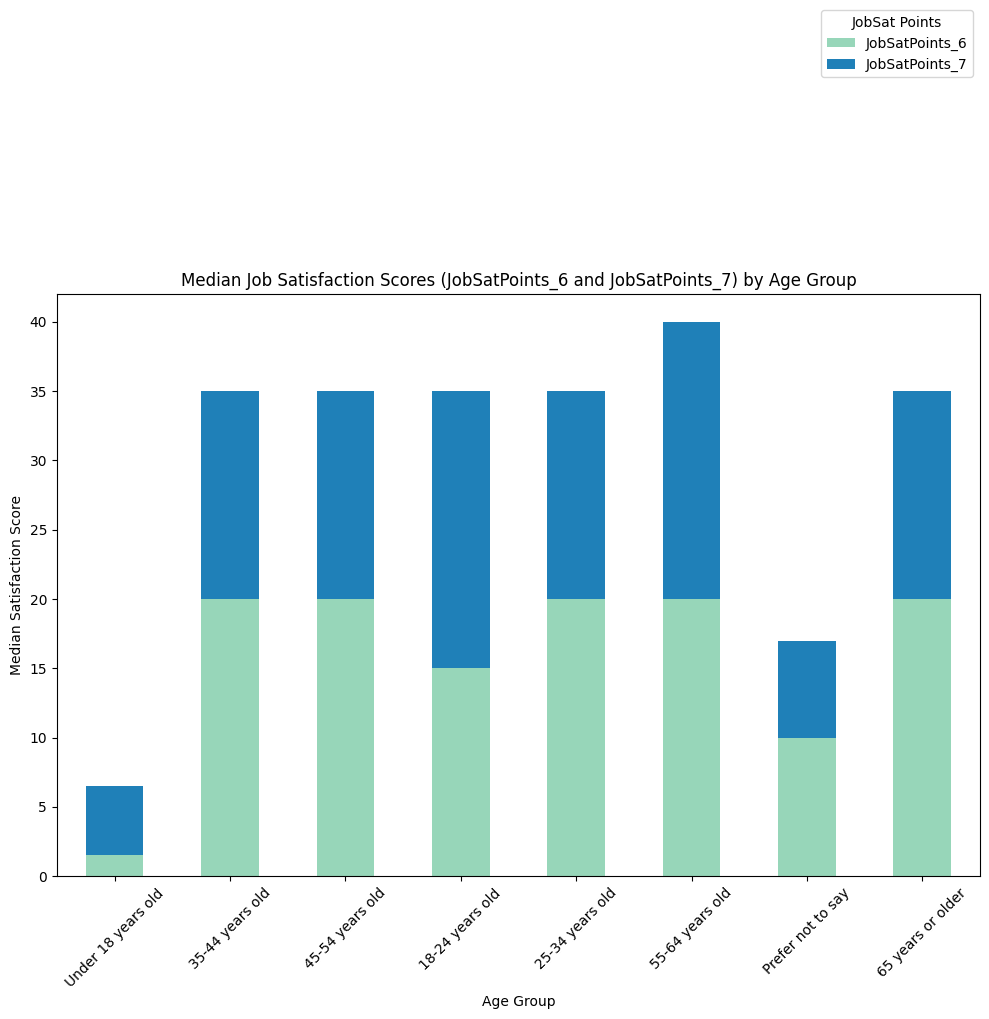

In [31]:
df_filtered = df.dropna(subset=['JobSatPoints_6','JobSatPoints_7','Age']).copy()

# group by age

# Define age group order if you want a specific sorting
age_order = ['Under 18 years old',
             '35-44 years old',
             '45-54 years old',
             '18-24 years old',
             '25-34 years old',
             '55-64 years old',
             'Prefer not to say',
             '65 years or older']

df_filtered['AgeGroup'] = pd.Categorical(df_filtered['Age'], categories=age_order, ordered=True)

# Group by age group and compute median satisfaction scores
median_satisfaction = df_filtered.groupby('AgeGroup',observed=False)[['JobSatPoints_6', 'JobSatPoints_7']].median()

# Sort age groups
median_satisfaction = median_satisfaction.sort_index()


colors = sns.color_palette("YlGnBu", n_colors=2)
# Plot a stacked bar chart

median_satisfaction.plot(kind='bar', color=colors, stacked=True, figsize=(10, 12))

# Add chart title and labels
plt.title('Median Job Satisfaction Scores (JobSatPoints_6 and JobSatPoints_7) by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Satisfaction Score')
plt.legend(title='JobSat Points',bbox_to_anchor=(1, 1.5),loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

##### 4. Bar Chart of Database Popularity (`DatabaseHaveWorkedWith`)


Identify the most commonly used databases among respondents by visualizing `DatabaseHaveWorkedWith`.



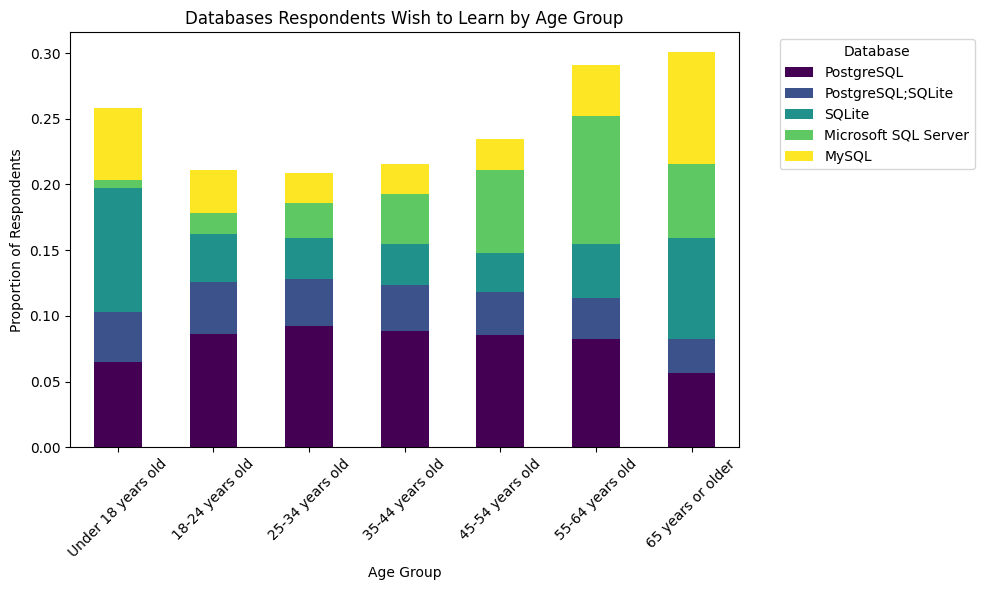

In [30]:
# Cleaned list of age groups
age_order = [
    'Under 18 years old', '18-24 years old', '25-34 years old',
    '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older'
]

#Filter 
df_filtered = df[['Age', 'DatabaseWantToWorkWith']].dropna()

# Normalize age as categorical
df_filtered['Age'] = pd.Categorical(df_filtered['Age'], categories=age_order, ordered=True)

#Expand multiple database choices into individual rows
df_expanded = df_filtered.assign(Database=df_filtered['DatabaseWantToWorkWith'].str.split(',')).explode('Database')
df_expanded['Database'] = df_expanded['Database'].str.strip()

# Step 3: Count database preferences per age group
database_counts = df_expanded.groupby(['Age', 'Database'], observed=False).size().unstack(fill_value=0)

# Step 4: Convert counts to proportions (row-wise normalization)
database_props = database_counts.div(database_counts.sum(axis=1), axis=0)

# Optional: focus on top N most common databases
top_databases = df_expanded['Database'].value_counts().nlargest(5).index
database_props = database_props[top_databases]

# Step 5: Plot as 100% stacked bar chart
database_props.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

# Add labels
plt.title('Databases Respondents Wish to Learn by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Proportion of Respondents')
plt.xticks(rotation=45)
plt.legend(title='Database', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Task 4: Visualizing Comparison of Data with Bar Charts


##### 1. Grouped Bar Chart of Median `ConvertedCompYearly` for Different Age Groups


Compare median compensation across multiple age groups with a grouped bar chart.



/tmp/ipykernel_301/3109104991.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped['Percent'] = grouped.groupby('Age')['Count'].transform(lambda x: x / x.sum() * 100)


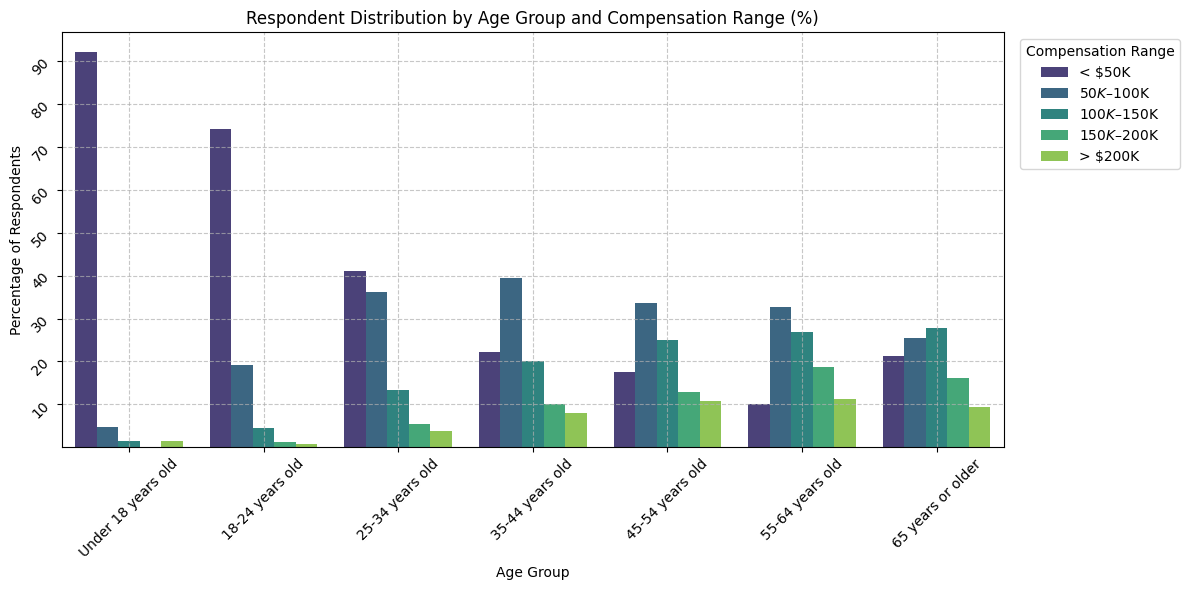

In [54]:
# 1. Drop missing values
df_clean = df.dropna(subset=['ConvertedCompYearly', 'Age']).copy()

# 2. Define ordered age groups
age_order = [
    'Under 18 years old', '18-24 years old', '25-34 years old',
    '35-44 years old', '45-54 years old', '55-64 years old',
    '65 years or older'
]
df_clean['Age'] = pd.Categorical(df_clean['Age'], categories=age_order, ordered=True)

# 3. Bin compensation
comp_bins = [0, 50000, 100000, 150000, 200000, np.inf]
comp_labels = ['< $50K', '$50K–$100K', '$100K–$150K', '$150K–$200K', '> $200K']
df_clean['CompensationRange'] = pd.cut(df_clean['ConvertedCompYearly'], bins=comp_bins, labels=comp_labels)

# 4. Count respondents in each group
grouped = df_clean.groupby(['Age', 'CompensationRange'], observed=False).size().reset_index(name='Count')

# Calculate % within each age group (row-wise %)
grouped['Percent'] = grouped.groupby('Age')['Count'].transform(lambda x: x / x.sum() * 100)

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=grouped, x='Age', y='Percent', hue='CompensationRange', palette='viridis')

plt.title('Respondent Distribution by Age Group and Compensation Range (%)')
plt.xlabel('Age Group')
plt.ylabel('Percentage of Respondents')
plt.yticks(ticks=[10,20,30,40,50,60,70,80,90],rotation=45)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.7,linestyle='--')
# Legend outside
plt.legend(title='Compensation Range', bbox_to_anchor=(1.01, 1), loc='upper left')
plt.tight_layout()
plt.show()

##### 2. Bar Chart of Respondent Count by Country


Show the distribution of respondents by country to see which regions are most represented.



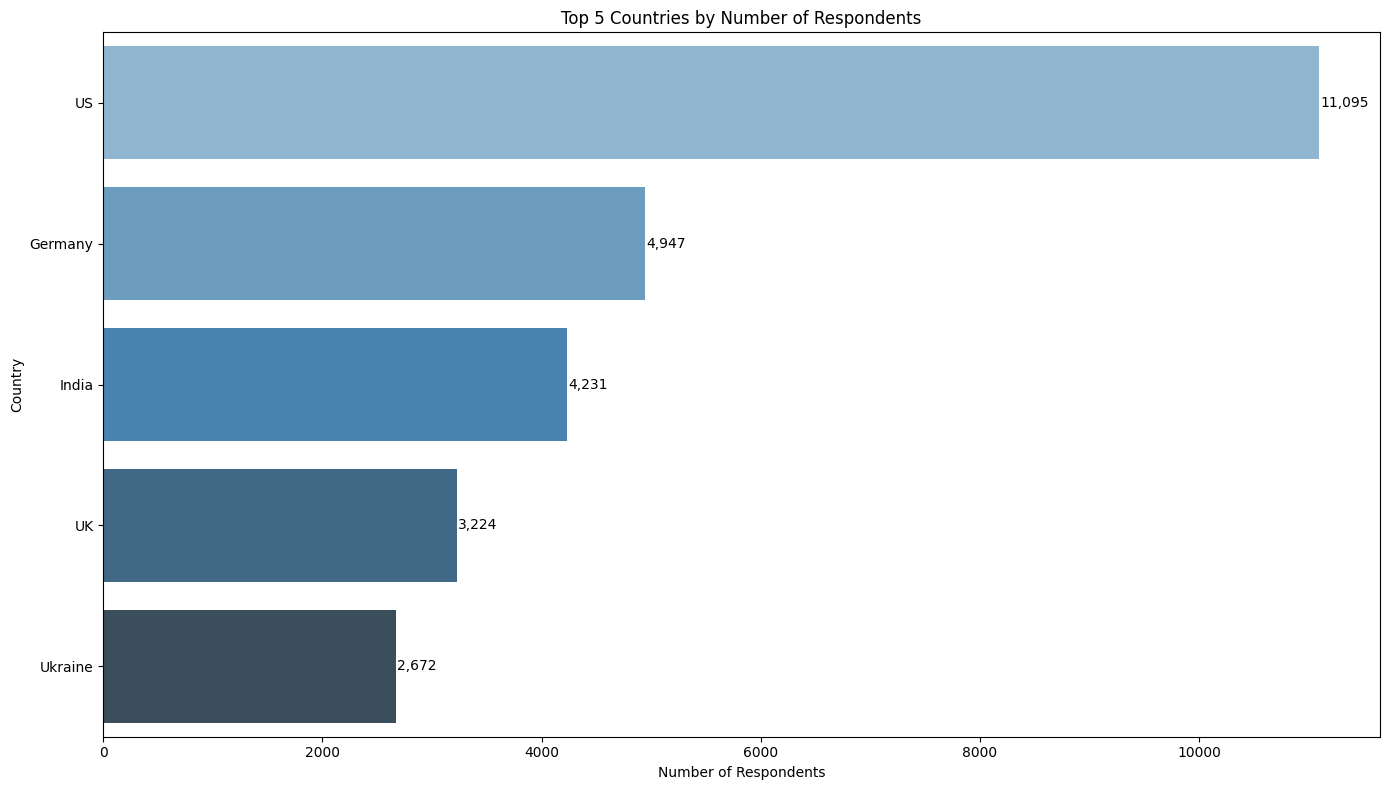

In [64]:
# Drop missing values in 'Country' column
df_country = df['Country'].dropna()


#Count respondents by country
country_counts = df_country.value_counts().nlargest(5).reset_index()
country_counts.columns = ['Country', 'RespondentCount']

country_counts['Country'] = country_counts['Country'].replace({
    'United States of America': 'US',
    'United Kingdom of Great Britain and Northern Ireland': 'UK'  # optional
})

# 3. Plot
plt.figure(figsize=(14, 8))
sns.barplot(data=country_counts, y='Country', x='RespondentCount', hue='Country', palette='Blues_d')

plt.title('Top 5 Countries by Number of Respondents')
plt.xlabel('Number of Respondents')
plt.ylabel('Country')

# Optional: Show labels
for i, row in country_counts.iterrows():
    plt.text(row['RespondentCount'] + 10, i, f"{row['RespondentCount']:,}", va='center')

plt.tight_layout()
plt.show()

### Final Step: Review


This lab demonstrates how to create and interpret different types of bar charts, allowing you to analyze the composition, comparison, and distribution of categorical data in the Stack Overflow dataset, including main professional branches, programming language preferences, and compensation by age group. Bar charts effectively compare counts and median values across various categories.


## Summary


After completing this lab, you will be able to:
- Create a horizontal bar chart to visualize the distribution of respondents' primary roles, helping to understand their professional focus.
- Develop a vertical bar chart to identify the most desired programming languages based on the LanguageWantToWorkWith variable.
- Use a stacked bar chart to compare job satisfaction metrics across different age groups.
- Create a bar chart to visualize the most commonly used databases among respondents using the DatabaseHaveWorkedWith variable.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
